In [1]:
pip install dtale

You should consider upgrading via the '/Users/jpot/opt/anaconda3/envs/pythondata/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import dtale
from scipy.stats import linregress
from scipy import stats
from matplotlib.pyplot import figure

# NASDAQ Analysis

In [3]:
base = 'output/'

historical_prices_df = pd.read_csv(base + 'nasdaq_historical_prices.csv')
historical_prices_df = historical_prices_df.drop(columns='Unnamed: 0')
historical_prices_df

,Company,Q1 Date,Q1 Price,Q2 Date,Q2 Price,Q3 Date,Q3 Price
0,DOCU,2020-01-31,78.5100,2020-04-30,104.7500,2020-07-31,216.830000
1,ZM,2020-01-31,76.3000,2020-04-30,135.1700,2020-07-31,253.910000
2,DXCM,2019-12-31,218.7400,2020-03-31,269.2700,2020-06-30,405.400000
3,SPLK,2020-01-31,155.2600,2020-04-30,140.3600,2020-07-31,209.820000
4,SGEN,2019-12-31,114.2600,2020-03-31,115.3800,2020-06-30,169.920000
...,...,...,...,...,...,...,...
98,NVDA,2020-01-26,NaN,2020-04-26,NaN,2020-07-26,NaN
99,PAYX,2020-02-29,NaN,2020-05-31,NaN,2020-08-31,76.470001
100,KLAC,2019-12-31,175.6855,2020-03-31,142.4356,2020-06-30,193.646300
101,CSCO,2020-01-25,NaN,2020-04-25,NaN,2020-07-25,NaN


In [4]:
financial_ratios_df = pd.read_csv(base + 'nasdaq_financial_ratios.csv')
financial_ratios_df = financial_ratios_df.drop(columns='Unnamed: 0')
financial_ratios_df

,Company,Q1 P/E,Q2 P/E,Q3 P/E,Q1 ROE,Q2 ROE,Q3 ROE,Q1 Date,Q2 Date,Q3 Date
0,DOCU,-299.597287,-400.948571,-620.874031,-0.086774,-0.091441,-0.128634,2020-01-31,2020-04-30,2020-07-31
1,ZM,1191.100353,1473.689789,405.682498,0.018393,0.030029,0.155144,2020-01-31,2020-04-30,2020-07-31
2,DXCM,218.504035,1273.281759,849.326134,0.105031,0.021295,0.034198,2019-12-31,2020-03-31,2020-06-30
3,SPLK,-1064.434087,-72.359266,-127.625338,-0.011367,-0.168823,-0.156529,2020-01-31,2020-04-30,2020-07-31
4,SGEN,759.556952,-118.084957,-1390.521355,0.013767,-0.095379,-0.011681,2019-12-31,2020-03-31,2020-06-30
...,...,...,...,...,...,...,...,...,...,...
98,NVDA,156.637749,201.356865,419.415270,0.077925,0.070005,0.044703,2020-01-26,2020-04-26,2020-07-26
99,PAYX,77.441170,116.583405,130.569997,0.128451,0.079349,0.076153,2020-02-29,2020-05-31,2020-08-31
100,KLAC,73.227875,285.357774,73.578936,0.142543,0.034000,0.154292,2019-12-31,2020-03-31,2020-06-30
101,CSCO,71.068582,64.528627,74.669499,0.080995,0.077686,0.069515,2020-01-25,2020-04-25,2020-07-25


In [5]:
financial_growth_df = pd.read_csv(base + 'nasdaq_financial_growth.csv')
dtale.show(financial_growth_df, ignore_duplicate=True)

In [6]:
nasdaq_df = historical_prices_df.merge(financial_ratios_df, how='outer', on=['Company', 'Q1 Date', 'Q2 Date', 'Q3 Date'])

dtale.show(nasdaq_df, ignore_duplicate=True)

In [7]:
clean_nasdaq_df = nasdaq_df.merge(financial_growth_df, how='outer', on=['Company', 'Q1 Date', 'Q2 Date', 'Q3 Date'])

In [8]:
# remove [SIRI BIDU INTC TCOM] from df

clean_nasdaq_df = clean_nasdaq_df.loc[(clean_nasdaq_df['Company'] != 'BIDU') & (clean_nasdaq_df['Company'] != 'SIRI')
                                     & (clean_nasdaq_df['Company'] != 'INTC') & (clean_nasdaq_df['Company'] != 'TCOM')]

clean_nasdaq_df = clean_nasdaq_df.reset_index(drop=True)

# change price to that 12/27/19
clean_nasdaq_df.loc[50, 'Q1 Price'] = 72.449997

# change price to that 3/27/20
clean_nasdaq_df.loc[50, 'Q2 Price'] = 61.935001

# change price to that of 6/26/20
clean_nasdaq_df.loc[50, 'Q3 Price'] = 88.407501

dtale.show(clean_nasdaq_df, ignore_duplicate=True)

In [9]:
clean_nasdaq_df = clean_nasdaq_df.dropna()
clean_nasdaq_df = clean_nasdaq_df.reset_index(drop=True)

In [10]:
dtale.show(clean_nasdaq_df, ignore_duplicate=True)

In [11]:
big_tech_df = clean_nasdaq_df.loc[(clean_nasdaq_df['Company'] == 'FB') | (clean_nasdaq_df['Company'] == 'AMZN') |  
                                  (clean_nasdaq_df['Company'] == 'AAPL') | 
                                  (clean_nasdaq_df['Company'] == 'MSFT') | 
                                  (clean_nasdaq_df['Company'] ==  'NFLX') | 
                                  (clean_nasdaq_df['Company'] == 'GOOG')]

big_tech_df = big_tech_df.reset_index(drop=True)
dtale.show(big_tech_df, ignore_duplicate=True)

In [12]:
# add price changes as percentage for NASDAQ
for index, row in clean_nasdaq_df.iterrows():
    clean_nasdaq_df.loc[index, 'Q1 Price Change'] =  100 * (row['Q1 Price'] - row['Q1 Price'])/(row['Q1 Price'])
    clean_nasdaq_df.loc[index, 'Q2 Price Change'] =  100 * (row['Q2 Price'] - row['Q1 Price'])/(row['Q1 Price'])
    clean_nasdaq_df.loc[index, 'Q3 Price Change'] =  100 * (row['Q3 Price'] - row['Q2 Price'])/(row['Q2 Price'])

clean_nasdaq_df.to_csv('output/clean_nasdaq_df.csv')
dtale.show(clean_nasdaq_df, ignore_duplicate=True)

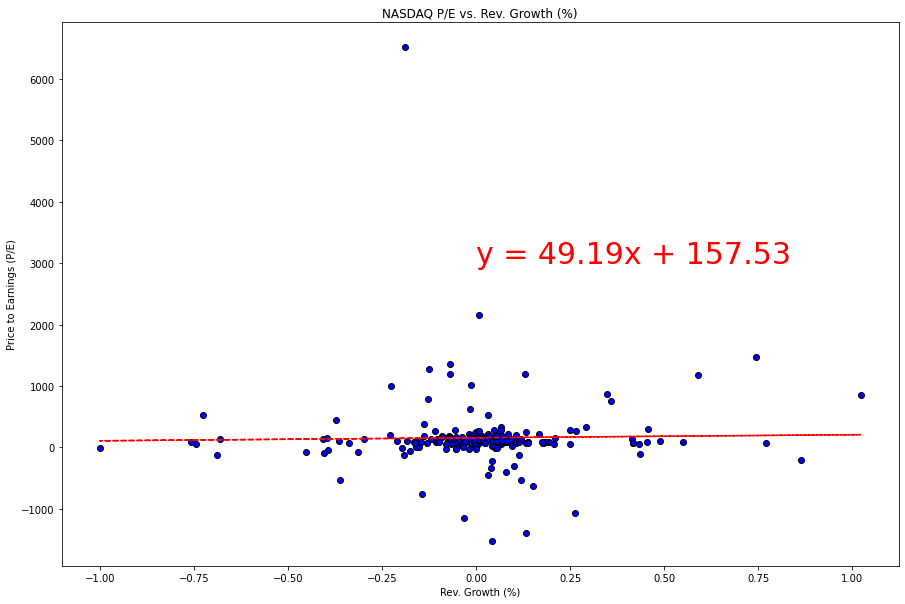

The r-value is: 0.020768396239956997


In [13]:
q1_rev = clean_nasdaq_df["Q1 Rev Growth"].to_list()
q2_rev = clean_nasdaq_df["Q2 Rev Growth"].to_list()
q3_rev = clean_nasdaq_df["Q3 Rev Growth"].to_list()

q1_pe = clean_nasdaq_df["Q1 P/E"].to_list()
q2_pe = clean_nasdaq_df["Q2 P/E"].to_list()
q3_pe = clean_nasdaq_df["Q3 P/E"].to_list()

# removes the largest outliers in the dataset
q3_rev.remove(max(q3_rev))
q3_pe.remove(q3_pe[q3_rev.index(max(q3_rev))])
q3_rev.remove(q3_rev[q3_pe.index(max(q3_pe))])
q3_pe.remove(max(q3_pe))

rev_growth = q1_rev + q2_rev + q3_rev
pe_ratios = q1_pe + q2_pe + q3_pe 

x_values = np.array(rev_growth)
y_values = np.array(pe_ratios)

slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.subplots(figsize=(15, 10))
plt.plot(x_values, regress_values, "r--")
plt.annotate(line_eq,(0,3000),fontsize=30, color="red")
plt.scatter(x_values, y_values, edgecolors="black", facecolors="blue")
plt.xlabel("Rev. Growth (%)")
plt.ylabel("Price to Earnings (P/E)")
plt.title("NASDAQ P/E vs. Rev. Growth (%)")
plt.savefig("graphs/nasdaq_rev_pe.png")
plt.show()
print(f"The r-value is: {r_value}")
#print("R-squared: %f" % r_value**2)

# S&P Analysis

In [14]:
base = 'output/'

historical_prices_df = pd.read_csv(base + 'snp_historical_prices.csv')
historical_prices_df = historical_prices_df.drop(columns='Unnamed: 0')
historical_prices_df = historical_prices_df.drop(columns='Company')
historical_prices_df

,Symbol,Q3 Date,Q3 Price,Q2 Date,Q2 Price,Q1 Date,Q1 Price
0,WAB,2020-06-30,57.471200,2020-03-31,47.9386,2019-12-31,77.3759
1,TTWO,2020-06-30,139.570000,2020-03-31,118.6100,2019-12-31,122.4300
2,CHD,2020-06-30,77.104400,2020-03-31,63.8084,2019-12-31,70.3250
3,MLM,2020-06-30,206.002100,2020-03-31,188.1841,2019-12-31,277.4322
4,EW,2020-09-30,79.820000,2020-06-30,69.1100,2020-03-31,62.8733
...,...,...,...,...,...,...,...
501,TYL,2020-06-30,346.880000,2020-03-31,296.5600,2019-12-31,300.0200
502,BIO,2020-06-30,451.490000,2020-03-31,350.5600,2019-12-31,370.0300
503,WST,2020-09-30,274.899994,2020-06-30,227.0339,2020-03-31,152.0159
504,DPZ,2020-09-06,NaN,2020-06-14,NaN,2020-03-22,NaN


In [15]:
financial_ratios_df = pd.read_csv(base + 's&p_finratios.csv')
financial_ratios_df = financial_ratios_df.drop(columns='Unnamed: 0')
financial_ratios_df

,Symbol,Q1 P/E,Q2 P/E,Q3 P/E,Q1 ROE,Q2 ROE,Q3 ROE,Q1 Date,Q2 Date,Q3 Date
0,MMM,103.165021,60.287913,69.598300,0.096293,0.127328,0.118817,2019-12-31,2020-03-31,2020-06-30
1,AOS,84.339444,117.939760,112.200856,0.054776,0.031987,0.040890,2019-12-31,2020-03-31,2020-06-30
2,ABT,145.714952,247.118970,302.746773,0.033743,0.018664,0.017562,2019-12-31,2020-03-31,2020-06-30
3,ABBV,45.145182,39.608159,-216.466906,-0.342756,-0.405934,-0.050177,2019-12-31,2020-03-31,2020-06-30
4,ABMD,112.618433,207.523380,246.766315,0.066118,0.029844,0.040467,2019-12-31,2020-03-31,2020-06-30
...,...,...,...,...,...,...,...,...,...,...
500,YUM,63.062576,250.930704,128.890820,-0.060878,-0.010086,-0.025407,2019-12-31,2020-03-31,2020-06-30
501,ZBRA,81.610223,112.645850,132.267734,0.091898,0.051534,0.055463,2019-12-31,2020-03-28,2020-06-27
502,ZBH,96.590975,-40.962778,-119.475547,0.025888,-0.042808,-0.017747,2019-12-31,2020-03-31,2020-06-30
503,ZION,49.450866,323.769464,83.890133,0.024888,0.001874,0.008713,2019-12-31,2020-03-31,2020-06-30


In [16]:
financial_growth_df = pd.read_csv(base + 'growth_data_SnP.csv')
#financial_growth_df = financial_growth_df.rename(columns={"Name": "Company"})
financial_growth_df = financial_growth_df.drop(columns='Unnamed: 0')
financial_growth_df = financial_growth_df.drop(columns='Name')
financial_growth_df

,Sector,Symbol,Q1 Rev Growth,Q1 Op Inc Growth,Q1 EPS Growth,Q2 Rev Growth,Q2 Op Inc Growth,Q2 EPS Growth,Q3 Rev Growth,Q3 Op Inc Growth,Q3 EPS Growth
0,Industrials,MMM,0.015017,-0.359025,-0.387556,-0.004438,0.290147,0.336083,-0.111331,0.046302,-0.000347
1,Industrials,AOS,0.031173,0.023936,0.054670,-0.151818,-0.413853,-0.429357,0.042393,0.285081,0.317254
2,Health Care,ABT,0.029470,0.106845,0.094281,-0.070724,-0.390649,-0.462041,-0.051514,-0.155941,-0.050260
3,Health Care,ABBV,0.026536,0.511655,0.482730,-0.009766,-0.089232,-0.005941,0.209537,-0.791285,-1.239304
4,Health Care,ABMD,0.081035,0.167442,4.320548,-0.067360,-0.240638,-0.538217,-0.202305,-0.361486,0.399448
...,...,...,...,...,...,...,...,...,...,...,...
500,Consumer Discretionary,YUM,0.265123,0.137500,0.932233,-0.254427,-0.542125,-0.828255,-0.051465,0.200000,1.481913
501,Information Technology,ZBRA,0.054867,0.016216,0.257473,-0.117450,-0.196809,-0.476518,-0.091255,-0.211921,0.137040
502,Health Care,ZBH,0.123283,0.370220,-0.259309,-0.160841,-2.353919,-2.596342,-0.312647,0.623465,0.594298
503,Financials,ZION,-0.002805,-0.184028,-0.164003,-0.040788,-0.931915,-0.920693,-0.002933,4.125000,3.959842


In [17]:
snp_price_ratio_df = historical_prices_df.merge(financial_ratios_df, how='outer', on=['Symbol', 'Q1 Date', 'Q2 Date', 'Q3 Date'])

snp_price_ratio_df

,Symbol,Q3 Date,Q3 Price,Q2 Date,Q2 Price,Q1 Date,Q1 Price,Q1 P/E,Q2 P/E,Q3 P/E,Q1 ROE,Q2 ROE,Q3 ROE
0,WAB,2020-06-30,57.4712,2020-03-31,47.9386,2019-12-31,77.3759,109.820179,82.217276,125.933436,0.013629,0.011432,0.008816
1,TTWO,2020-06-30,139.5700,2020-03-31,118.6100,2019-12-31,122.4300,85.479994,110.679922,181.282514,0.068126,0.048330,0.033385
2,CHD,2020-06-30,77.1044,2020-03-31,63.8084,2019-12-31,70.3250,121.142478,69.694989,102.141991,0.054127,0.081553,0.063259
3,MLM,2020-06-30,206.0021,2020-03-31,188.1841,2019-12-31,277.4322,132.628429,454.112210,58.979462,0.024482,0.004890,0.039628
4,EW,2020-09-30,79.8200,2020-06-30,69.1100,2020-03-31,62.8733,128.561597,-351.672953,152.742884,0.079619,-0.031752,0.077239
...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,COTY,2020-06-30,NaN,2020-03-31,NaN,2019-12-31,NaN,-399.820503,-14.454080,-4.452500,-0.004719,-0.072772,-0.255042
508,ETFC,2020-06-30,NaN,2020-03-31,NaN,2019-12-31,NaN,58.870841,41.980099,56.101336,0.026288,0.027765,0.028739
509,HRB,2020-07-31,NaN,2020-04-30,NaN,2020-01-31,NaN,-33.604415,6.843748,30.835003,0.407323,6.480807,0.674608
510,KSS,2020-08-01,NaN,2020-05-02,NaN,2020-02-01,NaN,22.899058,-5.471127,70.442556,0.048624,-0.112944,0.009717


In [18]:
snp_df = snp_price_ratio_df.merge(financial_growth_df, how='outer', on=['Symbol'])

dtale.show(snp_df, ignore_duplicate=True)

In [19]:
clean_snp_df = snp_df.loc[(snp_df['Symbol'] != 'OTIS') & (snp_df['Symbol'] != 'AXP')
                          & (snp_df['Symbol'] != 'CARR')]

clean_snp_df = clean_snp_df.reset_index(drop=True)

# change price to that 12/27/19
clean_snp_df.loc[184, 'Q1 Price'] = 72.449997

# change price to that 3/27/20
clean_snp_df.loc[184, 'Q2 Price'] = 61.935001

# change price to that of 6/26/20
clean_snp_df.loc[184, 'Q3 Price'] = 88.407501

dtale.show(clean_snp_df, ignore_duplicate=True)

In [20]:
clean_snp_df = clean_snp_df.dropna()
clean_snp_df = clean_snp_df.rename(columns={'Symbol': 'Company'})
clean_snp_df = clean_snp_df.reset_index(drop=True)

In [21]:
dtale.show(clean_snp_df, ignore_duplicate=True)

In [22]:
big_tech_df = clean_snp_df.loc[(clean_snp_df['Company'] == 'FB') | (clean_snp_df['Company'] == 'AMZN') |  
                                      (clean_snp_df['Company'] == 'AAPL') | 
                                      (clean_snp_df['Company'] == 'MSFT') | 
                                      (clean_snp_df['Company'] ==  'NFLX') | 
                                      (clean_snp_df['Company'] == 'GOOG')]

big_tech_df = big_tech_df.reset_index(drop=True)
dtale.show(big_tech_df, ignore_duplicate=True)

In [23]:
clean_nasdaq_df = pd.read_csv(base + 'clean_nasdaq_df.csv')
clean_nasdaq_df = clean_nasdaq_df.drop(columns='Unnamed: 0')
dtale.show(clean_nasdaq_df, ignore_duplicate=True)

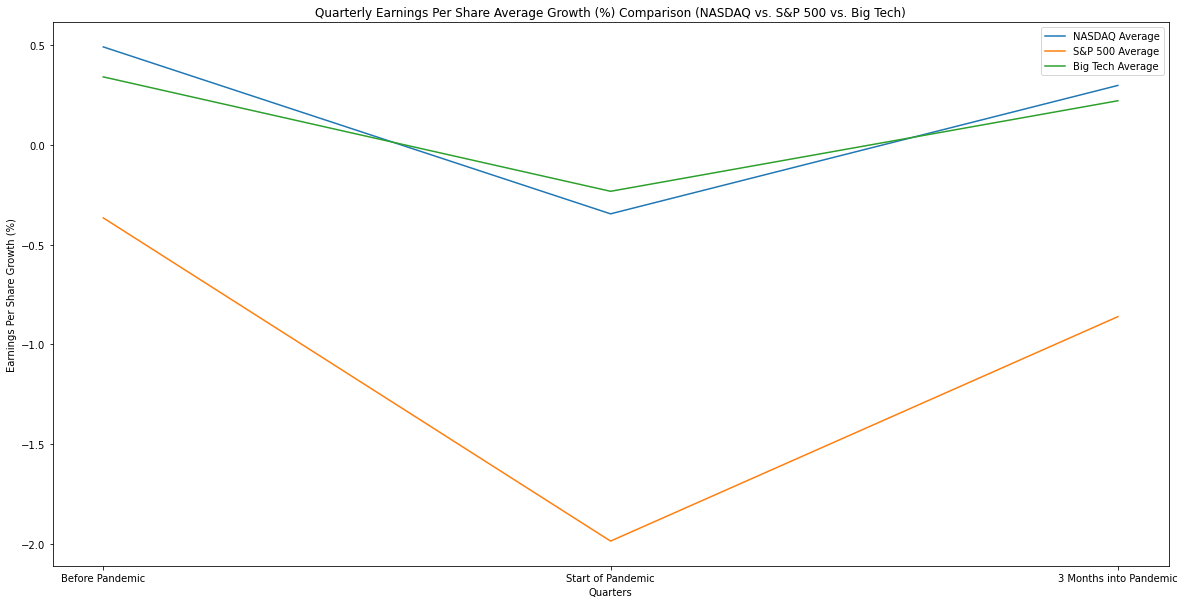

In [24]:
# EPS growth of S&P portfolio vs. EPS growth of Big Tech Companies
# over 3 quarters

# create the average EPS growth values for each quarter for NASDAQ, S&P 500, and Big Tech Companies
nasdaq_eps_values = [clean_nasdaq_df['Q1 EPS Growth'].mean(), clean_nasdaq_df['Q2 EPS Growth'].mean(), 
                     clean_nasdaq_df['Q3 EPS Growth'].mean()]

snp_eps_values = [clean_snp_df['Q1 EPS Growth'].mean(), clean_snp_df['Q2 EPS Growth'].mean(), 
                     clean_snp_df['Q3 EPS Growth'].mean()]

big_tech_eps_values = [big_tech_df['Q1 EPS Growth'].mean(), big_tech_df['Q2 EPS Growth'].mean(), 
                         big_tech_df['Q3 EPS Growth'].mean()]

quarters = ['Before Pandemic', 'Start of Pandemic', '3 Months into Pandemic']

plt.subplots(figsize=(20, 10))
plt.plot(quarters, nasdaq_eps_values, label='NASDAQ Average')
plt.plot(quarters, snp_eps_values, label='S&P 500 Average')
plt.plot(quarters, big_tech_eps_values, label='Big Tech Average')
    
plt.xlabel('Quarters')
plt.ylabel('Earnings Per Share Growth (%)')
plt.legend(loc='best')
plt.title('Quarterly Earnings Per Share Average Growth (%) Comparison (NASDAQ vs. S&P 500 vs. Big Tech)')

plt.savefig('graphs/eps_growth_comparison.png')
plt.show()

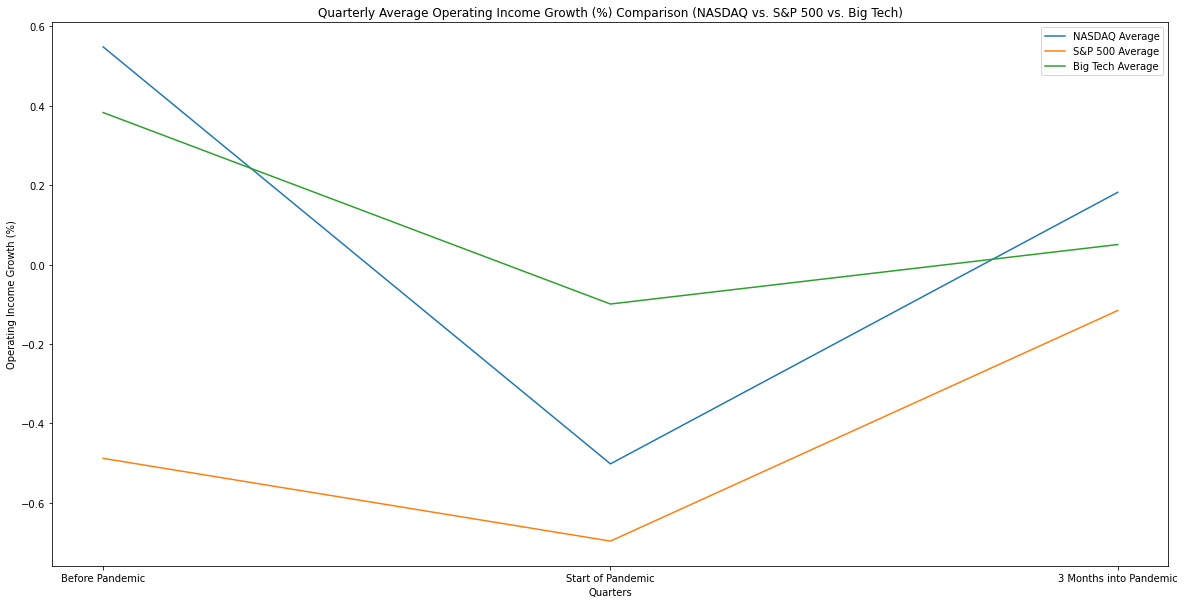

In [25]:
# create the average Operating Income growth values for each quarter for both NASDAQ and S&P 500
nasdaq_op_inc_values = [clean_nasdaq_df['Q1 Op Income Growth'].mean(), clean_nasdaq_df['Q2 Op Income Growth'].mean(), 
                     clean_nasdaq_df['Q3 Op Income Growth'].mean()]

snp_op_inc_values = [clean_snp_df['Q1 Op Inc Growth'].mean(), clean_snp_df['Q2 Op Inc Growth'].mean(), 
                     clean_snp_df['Q3 Op Inc Growth'].mean()]

big_tech_op_inc_values = [big_tech_df['Q1 Op Inc Growth'].mean(), big_tech_df['Q2 Op Inc Growth'].mean(), 
                         big_tech_df['Q3 Op Inc Growth'].mean()]

quarters = ['Before Pandemic', 'Start of Pandemic', '3 Months into Pandemic']

plt.subplots(figsize=(20, 10))
plt.plot(quarters, nasdaq_op_inc_values, label='NASDAQ Average')
plt.plot(quarters, snp_op_inc_values, label='S&P 500 Average')
plt.plot(quarters, big_tech_op_inc_values, label='Big Tech Average')
    
plt.xlabel('Quarters')
plt.ylabel('Operating Income Growth (%)')
plt.legend(loc='best')
plt.title('Quarterly Average Operating Income Growth (%) Comparison (NASDAQ vs. S&P 500 vs. Big Tech)')

plt.savefig('graphs/op_inc_growth_comparison.png')
plt.show()

In [26]:
# add price changes as percentage for S&P
for index, row in clean_snp_df.iterrows():
    clean_snp_df.loc[index, 'Q1 Price Change'] =  100 * (row['Q1 Price'] - row['Q1 Price'])/(row['Q1 Price'])
    clean_snp_df.loc[index, 'Q2 Price Change'] =  100 * (row['Q2 Price'] - row['Q1 Price'])/(row['Q1 Price'])
    clean_snp_df.loc[index, 'Q3 Price Change'] =  100 * (row['Q3 Price'] - row['Q2 Price'])/(row['Q2 Price'])

dtale.show(clean_snp_df, ignore_duplicate=True)

In [27]:
# add price changes as percentage for Big Tech
for index, row in big_tech_df.iterrows():
    big_tech_df.loc[index, 'Q1 Price Change'] =  100 * (row['Q1 Price'] - row['Q1 Price'])/(row['Q1 Price'])
    big_tech_df.loc[index, 'Q2 Price Change'] =  100 * (row['Q2 Price'] - row['Q1 Price'])/(row['Q1 Price'])
    big_tech_df.loc[index, 'Q3 Price Change'] =  100 * (row['Q3 Price'] - row['Q2 Price'])/(row['Q2 Price'])

dtale.show(big_tech_df, ignore_duplicate=True)

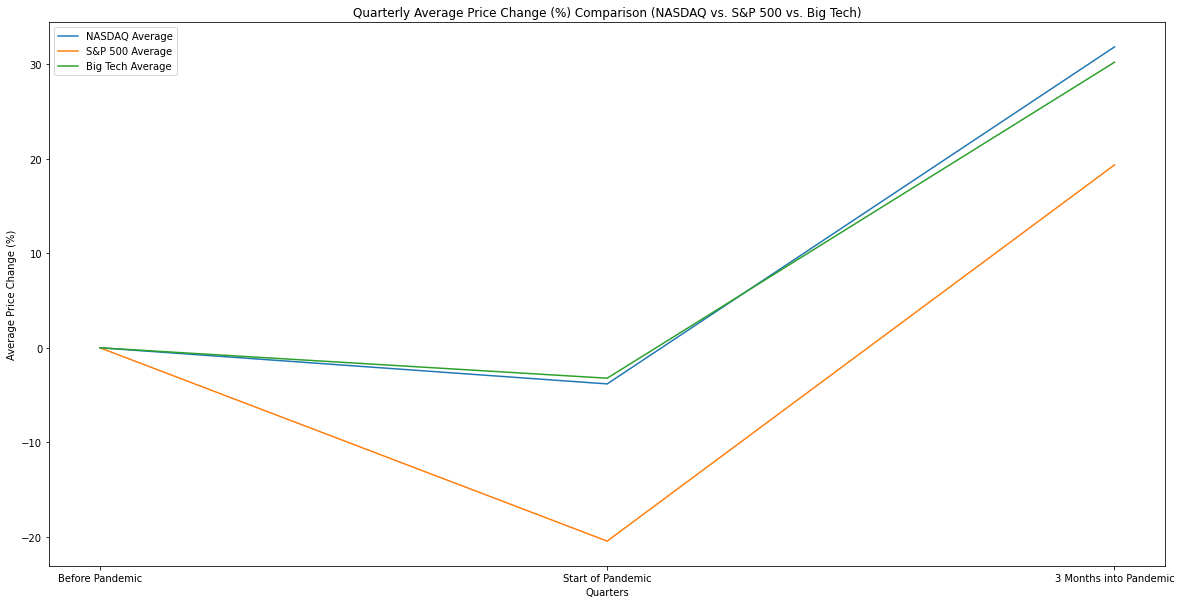

In [28]:
# Price Changes over 3 quarters: NASDAQ vs. S&P 500 vs. Big Tech
nasdaq_price_values = [clean_nasdaq_df['Q1 Price Change'].mean(), clean_nasdaq_df['Q2 Price Change'].mean(), 
                     clean_nasdaq_df['Q3 Price Change'].mean()]

snp_price_values = [clean_snp_df['Q1 Price Change'].mean(), clean_snp_df['Q2 Price Change'].mean(), 
                     clean_snp_df['Q3 Price Change'].mean()]

big_tech_price_values = [big_tech_df['Q1 Price Change'].mean(), big_tech_df['Q2 Price Change'].mean(), 
                         big_tech_df['Q3 Price Change'].mean()]

quarters = ['Before Pandemic', 'Start of Pandemic', '3 Months into Pandemic']

plt.subplots(figsize=(20, 10))
plt.plot(quarters, nasdaq_price_values, label='NASDAQ Average')
plt.plot(quarters, snp_price_values, label='S&P 500 Average')
plt.plot(quarters, big_tech_price_values, label='Big Tech Average')
    
plt.xlabel('Quarters')
plt.ylabel('Average Price Change (%)')
plt.legend(loc='best')
plt.title('Quarterly Average Price Change (%) Comparison (NASDAQ vs. S&P 500 vs. Big Tech)')

plt.savefig('graphs/price_change_comparison.png')
plt.show()

In [29]:
# creating p/e and roe lists

q1_pe = big_tech_df["Q1 P/E"].to_list()
q2_pe = big_tech_df["Q2 P/E"].to_list()
q3_pe = big_tech_df["Q3 P/E"].to_list()

q1_rev = big_tech_df["Q1 Rev Growth"].to_list()
q2_rev = big_tech_df["Q2 Rev Growth"].to_list()
q3_rev = big_tech_df["Q3 Rev Growth"].to_list()

final_pe = q1_pe + q2_pe + q3_pe
final_rev = q1_rev + q1_rev + q1_rev

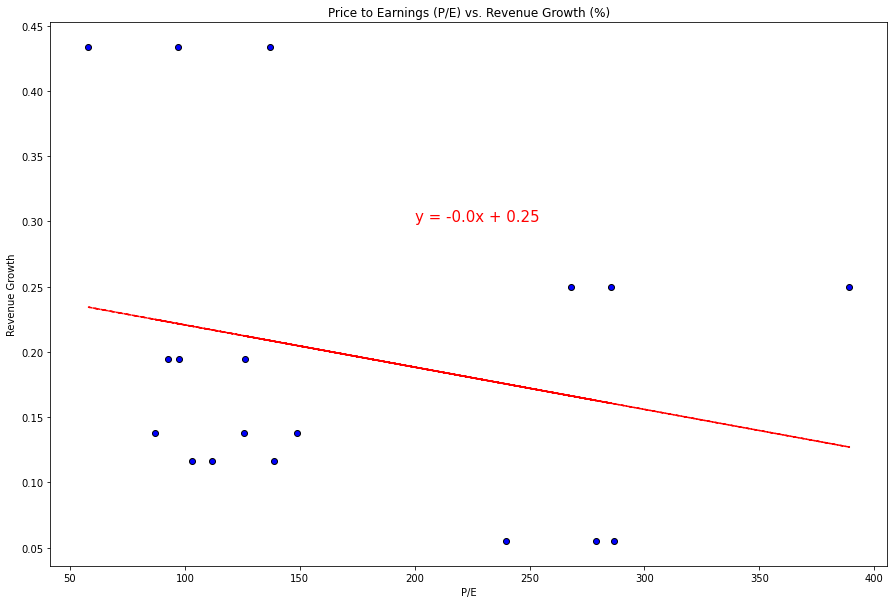

The rvalue is: -0.2439276086475312


In [30]:
x_values = np.array(final_pe)
y_values = np.array(final_rev)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.subplots(figsize=(15,10))
plt.scatter(x_values, y_values, edgecolors="black", facecolors="blue")
plt.plot(x_values, regress_values, "r--")
plt.annotate(line_eq,(200, 0.30),fontsize=15, color="red")
plt.xlabel("P/E")
plt.ylabel("Revenue Growth")
plt.title("Price to Earnings (P/E) vs. Revenue Growth (%)")

plt.savefig("graphs/pe_rev_growth_snp.png")
plt.show()
print(f"The rvalue is: {rvalue}")

In [31]:
q1_ROE_nasdaq = clean_nasdaq_df["Q1 ROE"].to_list() 
avg_roe_q1 = round(sum(q1_ROE_nasdaq) / len(q1_ROE_nasdaq) * 100, 2)

q2_ROE_nasdaq = clean_nasdaq_df["Q2 ROE"].to_list()
avg_roe_q2 = round(sum(q2_ROE_nasdaq) / len(q2_ROE_nasdaq) * 100, 2)

q3_ROE_nasdaq = clean_nasdaq_df["Q3 ROE"].to_list()
avg_roe_q3 = round(sum(q3_ROE_nasdaq) / len(q3_ROE_nasdaq) * 100, 2)

# S&P ROE 

q1_ROE_snp = clean_snp_df["Q1 ROE"].to_list()
avg_roe_q1_snp = round(sum(q1_ROE_snp) / len(q1_ROE_snp) * 100, 2)

q2_ROE_snp = clean_snp_df["Q2 ROE"].to_list()
avg_roe_q2_snp = round(sum(q2_ROE_snp) / len(q2_ROE_snp) * 100, 2)

q3_ROE_snp = clean_snp_df["Q3 ROE"].to_list()
avg_roe_q3_snp = round(sum(q3_ROE_snp) / len(q3_ROE_snp) * 100, 2)

# BIG TECH ROE

big_tech_q1 = big_tech_df["Q1 ROE"].to_list()
big_tech_q1_avg = round(sum(big_tech_q1) / len(big_tech_q1) * 100, 2)

big_tech_q2 = big_tech_df["Q2 ROE"].to_list()
big_tech_q2_avg = round(sum(big_tech_q2) / len(big_tech_q2) * 100, 2)

big_tech_q3 = big_tech_df["Q3 ROE"].to_list()
big_tech_q3_avg = round(sum(big_tech_q3) / len(big_tech_q3) * 100, 2)
print(avg_roe_q3)

9.8


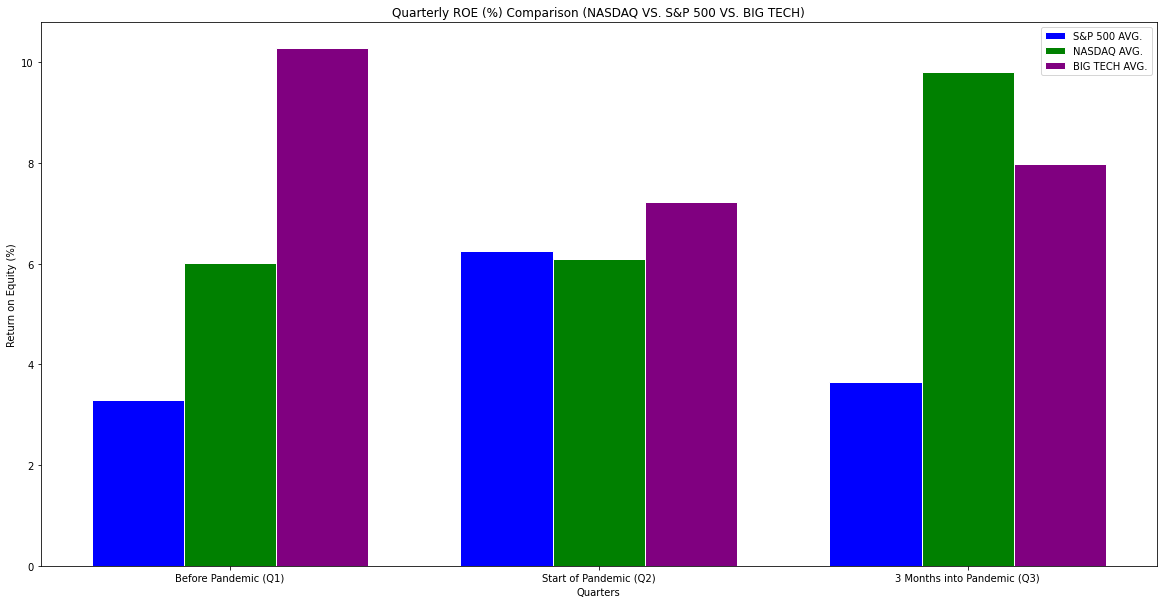

In [32]:
q1_snp = np.array([avg_roe_q1_snp, avg_roe_q2_snp, avg_roe_q3_snp])
q1_nasdaq = np.array([avg_roe_q1, avg_roe_q2, avg_roe_q3])
q1_tech = np.array([big_tech_q1_avg, big_tech_q2_avg, big_tech_q3_avg])

barWidth = 0.25
labels = ["Q1", "Q2", "Q3"]

x_axis = np.arange(len(labels))
#ig, ax = plt.subplots()


r1 = np.arange(len(x_axis))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.subplots(figsize=(20,10))
plt.bar(r1, q1_snp, color='blue', width=barWidth, edgecolor='white', label='S&P 500 AVG.')
plt.bar(r2, q1_nasdaq, color='green', width=barWidth, edgecolor='white', label='NASDAQ AVG.')
plt.bar(r3, q1_tech, color='purple', width=barWidth, edgecolor='white', label='BIG TECH AVG.')
plt.xticks([r + barWidth for r in range(len(labels))], ["Before Pandemic (Q1)", "Start of Pandemic (Q2)",
                                                        "3 Months into Pandemic (Q3)"])
plt.xlabel("Quarters")
plt.ylabel("Return on Equity (%)")
plt.title("Quarterly ROE (%) Comparison (NASDAQ VS. S&P 500 VS. BIG TECH)")
plt.legend(loc="best")
plt.savefig("graphs/quarterly_roe_comparison.png")
plt.show()